# Data project: Italy, patterns of its Aging problem

**Table of contents**<a id='toc0_'></a>    
-  [Imports](#toc1_)      
 - [Read and clean data](#toc2_) 
  - [Analysis](#toc3_)   
  - [Conclusion](#toc4_)   











<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This project studies Italy's demographic data over the last 30 years and  attempts at identifying patterns for future policy making.
The analysis is carried through different datasets: some from DemoIstat, a few with information on resident population by year, gender, age and region for the years 1992 to 2021 and one with forecasted population data for the next 50 years; two from the World Bank with observations organized by birth rate and fertility rate. 
After manipulating the data to shape a final dataset, we presented our analysis of the demographic patterns in the country.


##  <a id='toc1_'></a>[Imports](#toc0_)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.graph_objects as go
import glob
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
# user written modules
from pandas_datareader import wb
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from dataproject import dataproject
import matplotlib.ticker as ticker


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  <a id='toc2_'></a>[Read and clean data](#toc0_)

Data from 1992 to 2001 is downloaded and cleaned in various steps. The operations are conducted within classes as to improve readability.

In [7]:
#An istance of the class is created
project = dataproject()

In a first preliminary exploaration of demographic patterns, data from DemoIstat from 1992 to 2001 is downloaded 
and the different datasets are merged into a single dataset through an outer join, i.e. all records from the data frames are included in the result

In [3]:
project.merge().head()

,Age,Sex,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Males,262256,293100,281875,274171,269122,273472,273404,270959,...,289377,284926,276371,274396,263091,257024,248474,241228,234151,221685
1,0,Females,248552,277354,266660,258677,253857,258096,258674,255666,...,272945,268292,260976,259651,249049,242916,234503,228728,220915,209322
2,0,Total,510808,570454,548535,532848,522979,531568,532078,526625,...,562322,553218,537347,534047,512140,499940,482977,469956,455066,431007
3,1,Males,267914,264589,292378,280911,273119,268728,271549,270301,...,292642,288996,284199,277263,274308,262728,256954,248341,241422,234386
4,1,Females,255186,251203,276723,265953,258026,253591,256424,255967,...,277321,272698,267521,261900,259608,248720,242753,234634,228990,221360


Data cleaning is performed on the dataset: variables are renamed (in order not to have numbers as variable names); the dataset is reshaped and sorted by year and gender


In [4]:
project.cleaning().head()

,year,Age,Females,Males,Total
0,1992,0,248552,262256,510808
1,1992,1,255186,267914,523100
2,1992,10,300206,313202,613408
3,1992,100 and over,2229,623,2852
4,1992,11,305720,319714,625434


We append two datasets: one relative to 2020 and one for 2021

In [5]:
project.concat().tail()

,year,Age,Females,Males,Total
3055,2021,97,22849,6167,29016
3056,2021,98,16115,3998,20113
3057,2021,99,11109,2526,13635
3058,2021,100 and over,14330,2847,17177
3059,2021,Total,30369987,28866226,59236213


For the dataset to be sorted, the variable age is destringed and the variable age_group is created.

In [10]:
pop_italy_agg=project.construction_of_final_dataset()

In [11]:
pop_italy_agg.head()

,age_group,year,Males,Females,Total
0,0-4,1992,1342186,1275839,2618025
1,5-9,1992,1440822,1376508,2817330
2,10-14,1992,1691555,1621899,3313454
3,15-19,1992,2140091,2062555,4202646
4,20-24,1992,2314913,2243348,4558261


 ## <a id='toc3_'></a>[Analysis](#toc0_)

Now that we have explored and cleaned the dataset, we will now begin our analysis.

In this project we aim to show the demographic changes in Italy spanning in the last 30 years. We will try to explore and illustrate the reasons for the demographic changes by including fertility and life expectancy rates. Furthermore we will include a quick dicussion on how these demographic changes could impact the Pay As You Go (PAYG) pension system, that us currently used in Italy.  The PAYG system relias on the working population to support the retired population and as such, fertility and mortality rates can significantly impact how sustainable this system is.



The first thing we do is take a look at the population over the last 30 years with an interactive plot. The graph is interactive, so to see a specific age group, you need to choose it.

In [12]:
##a. Plot of Italy's total population by age_group from 1992 to 2021
def plot_pop(df, age_group): 
    I = df['age_group'] == age_group
    ax=df.loc[I,:].plot(x='year', y='Total', style='-o', legend=False)
    ax.set_ylabel('Population')
    ax.set_title(f'Population in age group {age_group}')

In [14]:
widgets.interact(plot_pop, 
    df = widgets.fixed(pop_italy_agg),
    age_group = widgets.Dropdown(description='Age_group', 
                                    options=pop_italy_agg['age_group'].unique(), 
                                    value='0-4')
);

interactive(children=(Dropdown(description='Age_group', options=('0-4', '5-9', '10-14', '15-19', '20-24', '25-…

Graph 1. Over the years between 1992 and 2021, younger age groups from 0-4 to 25-29 display a quasi-linear pattern of decrease. Age groups between 30-34 to 40-44 experience a more variable pattern, with peaks of observations at different points within our dataframe, but in recent years, approximately from 2005, they also exhibit a decline.
Conversely, observations belonging to middle age to late adulthood, i.e. from 45-49 to 100+, evolve according to an increasing trend. Besides, all the age groups register a contraction between 2019 and 2021, the years of the Covid pandemic. Further dynamics could be investigated to explain the various patterns of variation between age groups over certain years. Overall, there exists an evident pattern of an aging population.

The second thing we do is take a look at the population over the last 30 years with a population pyramid. The graph is interactive, so to see a specific year, the slider needs to be used.

In [15]:
# Plotting the population by age group
def plot_pop_pyramid(df, year): 
    I = df['year'] == year
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.barh(y=df.loc[I,'age_group'], width=df.loc[I,'Females'], color='#ee7a87', label='Female');
        ax.barh(y=df.loc[I,'age_group'], width=-df.loc[I,'Males'], color='#4682b4', label='Male');

        ax.grid(True)
        ax.set_xlim(-3000000, 3000000)
        ax.set_xticks(range(-3000000, 4000000, 1000000))
        ax.set_xticklabels(["{}M".format(abs(i)//1000000) for i in range(-3000000, 4000000, 1000000)])
        ax.set_xlabel('Population', fontsize=16, fontweight='bold')
        ax.set_ylabel('Age group', fontsize=16, fontweight='bold')
        ax.legend()
        ax.set_title(f'Population Pyramid Chart in Italy in {year}', loc='left', pad=20, fontsize=25, fontweight='bold')

In [16]:
# Create an interactive widget with a slider to choose the year
widgets.interact(plot_pop_pyramid,
                 df=widgets.fixed(pop_italy_agg),
                 year=widgets.IntSlider(description='Year',
                                        min=pop_italy_agg['year'].min(),
                                        max=pop_italy_agg['year'].max(),
                                        step=1,
                                        value=pop_italy_agg['year'].min(),
                                        continuous_update=True,
                                        disabled = False)
);

interactive(children=(IntSlider(value=1992, description='Year', max=2021, min=1992), Output()), _dom_classes=(…

The pyramide plot above shows how Italy's population evolved by age group over the years, from 1992 to 2021.  An aging pattern is evident: the numbers younger aged slims over the years, while the size of middle age groups and the elder's grows. Two the takeaways: on one hand a decrease in babies born, on the other an increase in life expectancy. Now we will look at the Birth rate and life expectancy for Italy, to better understand why the demographic is changing the way it is.

Next, the Birth rate and Life Expectancy of the Italian population are analysed, to better understand why the demographic is evolving the way it does.

In [17]:
# Downloading life expectancy data for Italy
wb_fr = wb.download(indicator='SP.DYN.LE00.IN', country=['IT'], start=1992, end=2021)
wb_fr.reset_index(inplace=True)
wb_fr.rename(columns={'SP.DYN.LE00.IN': 'life_expectancy'}, inplace=True)

In [18]:
#the variable year is an object but it should be an integer
wb_fr.info()
wb_fr['year'] = wb_fr['year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          30 non-null     object 
 1   year             30 non-null     object 
 2   life_expectancy  30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


In [19]:
# Downloading birth rate data for Italy
wb_birth = wb.download(indicator='SP.DYN.CBRT.IN', country=['IT'], start=1992, end=2021)
wb_birth.reset_index(inplace=True)
wb_birth.rename(columns={'SP.DYN.CBRT.IN': 'birth_rate'}, inplace=True)

In [20]:
wb_birth.info()

#the variable year is an object but it should be an integer
wb_birth['year'] = wb_birth['year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     30 non-null     object 
 1   year        30 non-null     object 
 2   birth_rate  30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 852.0+ bytes


In [21]:
# Merging dataframes on 'year'
merged_df = pd.merge(wb_fr, wb_birth, how='outer',on='year')

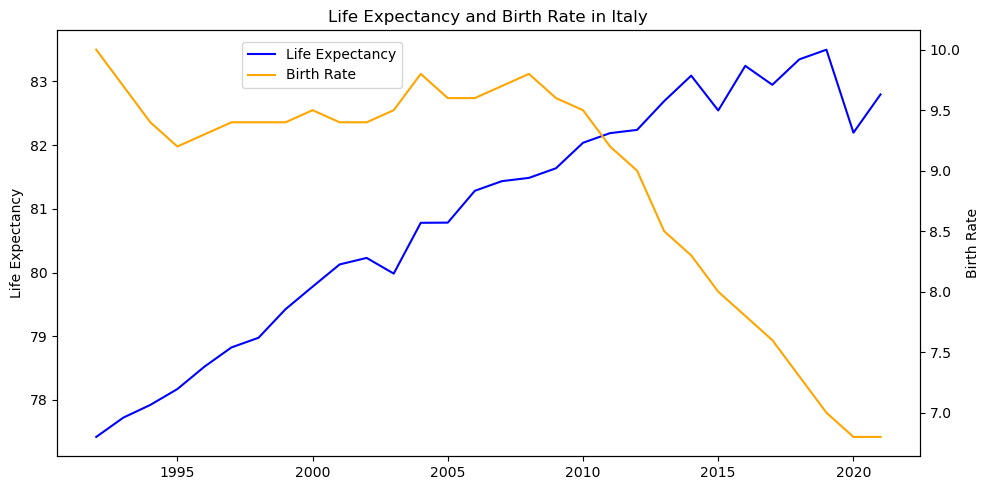

In [22]:
# Creating a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting life expectancy on primary y-axis
ax1.plot(merged_df['year'], merged_df['life_expectancy'], color='blue', label='Life Expectancy')
ax1.set_ylabel('Life Expectancy', color='black')

# Creating a secondary y-axis for birth rate
ax2 = ax1.twinx()
ax2.plot(merged_df['year'], merged_df['birth_rate'], color='orange', label='Birth Rate')
ax2.set_ylabel('Birth Rate', color='black')

# Adding title and legend
plt.title('Life Expectancy and Birth Rate in Italy')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.24, 0.92))                                 
plt.show()

Graph 2. The graph above shows the birth rate (crude, per 1000 people) and the life expectancy rate at birth (total, years). At the start the birth rate flucturates around the 9.5 mark, but around 2008 the graph exhibits a steady decline. On the other hand, life expectancy at birth is mostly steadily increasing throughout the whole period (except for a few outliers, fx the dip following covid). 

Given the increasing life expectancy and declining birth rates, we are witnessing a demographic shift towards an aging population (As well as most parts of the world). This trend will result in a smaller workforce bearing the responsibility of supporting the elderly. This scenario represents a challenge for the PAYG system and suggests its revision will be needed in the foreseeable future.

We now want to delve deeper into the different regions of Italy, and see which how the fertility rates differ across regions

In [23]:
project.fertility().head()

,region,total_fertility_rate,year
0,Piemonte,1.08,1992
1,Valle d'Aosta/Vallée d'Aoste,1.10,1992
2,Liguria,1.03,1992
3,Lombardia,1.12,1992
4,Trentino-Alto Adige/Südtirol,1.42,1992


In [24]:
project.maps_interactive()

Graph 3. The interactive map displays the total fertility rate of italian regions over the years between 1992 and 2021. Two trends can be detected. One relates to an aging population, as the Italian regions exhibiting a high fertility rate decrease over the years. In particular, in 1992 five Italian regions register high fertilities rate above 1.6; then the overall fartility rate decreases over the years, until 2021 when no region exhibit an high fertility rate of 1.6 or higher, and only one presents a fertility rate around the medium value of 1.6. Then a second trend is that of a reversal pattern between the dynamics of the North and the South of the peninsula, as an outcome of its idustrialisation. Indeed, in 1992 the South registers the highest fertility rates, while Central regions have a population of medium fertility and the North - except for Trentino Alto Adige- displays the lowest fertility rates. This pattern evolves towards omologation between the regions in the years between 1992 and 2007. Between 2007 and 2010 teh trend reverses and Central to Northern regions register the highest fertility rates from over 1.4. Then, from 2012 to 2021 almost all regions exhibit low fertility rates around 1.2, except for Sardinia that registers a 1 and Trentino Alto Adige whose value is around 1.5. 
Overall, throughout out time span, not only omologation happens towards lower values of the fertility rate but also Northern regions' fertility rates grow with respect to those of Southern regions, as a result of their greater industrialisation.

## Forecasting

In [25]:
#we load the data for the population projection
pop_projection = pd.read_csv('Population Projection.csv')

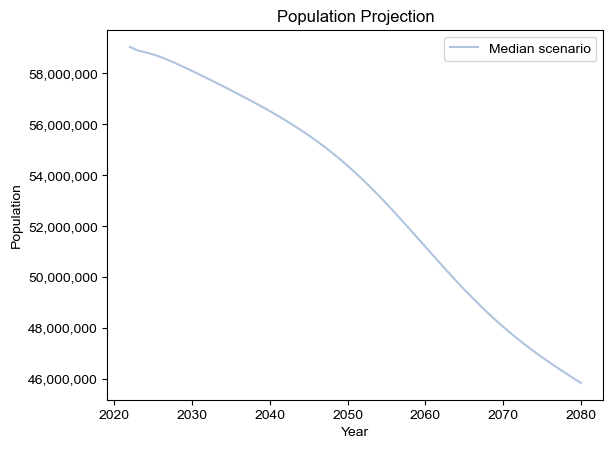

In [26]:
# setting up forecast plot
ax = pop_projection.plot('Year', 'Median scenario', kind='line', legend=True, title='Population Projection',color='lightsteelblue')

# labels:
plt.xlabel('Year')
plt.ylabel('Population')

# Change y-axis to display as real numbers
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.style.use('seaborn-v0_8')

# Show plot
plt.show()


Graph 4. The graph reports the forecast median population for the next 60 decades. The forecast confirms the pattern we have been detecting from the real data: Italian population has been aging over the years and thus it is in decline. 

 ## <a id='toc4_'></a>[Conclusion](#toc0_)

The research conducted on real data structured at regional level documents the Italian population is aging. Overall, its fertility is in decline and has reversed its pattern between regions, i.e. over the years between 1991 and 2021 Southern regions have registered increasingly lower values, while Northern regions have experienced the reverse pattern. This may be due to Northern regions having experienced industrialisation over the last decades, unlike Southern regions that remain underdeveloped to this day. Altough we may interpret this phenomenon hypothesizing a correlation between industrialization and fertility, we avoid making additional arguments, as these could only be invoked through further analysis. Finally, a forecast of the median age of the population for the next 6o decades is plot. This confirms the aging pattern detected through real data. 